In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import collections
import quantities as pq
import numpy as np
import time


from jithub.models import model_classes
import unittest


/home/user/anaconda3/lib/python3.7/site-packages/cerberus/validator.py:1609: UserWarning: No validation schema is defined for the arguments of rule 'not_zero_obs_zscore'
  "'%s'" % method_name.split('_', 2)[-1]


# simple examples:

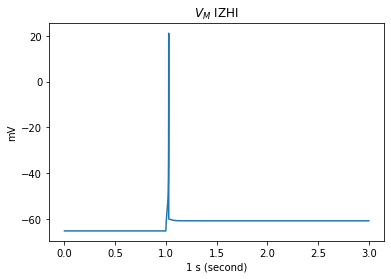

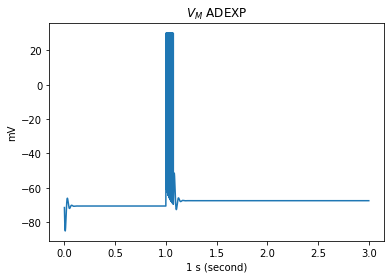

In [2]:

cellmodels = ["IZHI","ADEXP"]

for cellmodel in cellmodels:
    if cellmodel == "IZHI":
        model = model_classes.IzhiModel()
        amp = 142.5*pq.pA

    if cellmodel == "ADEXP":

        model = model_classes.ADEXPModel()
        amp = 12.5*pq.pA

    ALLEN_DELAY = 1000.0 * pq.ms
    ALLEN_DURATION = 2000.0 * pq.ms
    uc = {
        "amplitude": amp,
        "duration": ALLEN_DURATION,
        "delay": ALLEN_DELAY,
    }
    model.inject_square_current(**uc)
    vm = model.get_membrane_potential()
    plt.clf()
    plt.plot(vm.times,vm)
    plt.xlabel(pq.s)
    plt.ylabel(vm.dimensionality)
    plt.title("$V_{M}$"+str(" ")+str(cellmodel))
    
    plt.show()

# Consistency of Izhikevich models

In [3]:


DELAY = 0*pq.ms
DURATION = 250 *pq.ms

%matplotlib inline

# https://www.izhikevich.org/publications/spikes.htm
type2007 = collections.OrderedDict([
  #              C    k     vr  vt vpeak   a      b   c    d  celltype    
  ('RS',        (100, 0.7,  -60, -40, 35, 0.03,   -2, -50,  100,  1)),
  ('IB',        (150, 1.2,  -75, -45, 50, 0.01,   5, -56,  130,   2)),
  ('TC',        (200, 1.6,  -60, -50, 35, 0.01,  15, -60,   10,   6)),
  ('LTS',       (100, 1.0,  -56, -42, 40, 0.03,   8, -53,   20,   4)),
  ('RTN',       (40,  0.25, -65, -45, 0,  0.015, 10, -55,  50,    7)),
  ('FS',        (20,  1,    -55, -40, 25, 0.2,   -2, -45,  -55,   5)),
  ('CH',        (50,  1.5,  -60, -40, 25, 0.03,   1, -40,  150,   3))])
    
    

trans_dict = collections.OrderedDict([(k,[]) for k in ['C','k','vr','vt','vPeak','a','b','c','d','celltype']])
for i,k in enumerate(trans_dict.keys()):
    for v in type2007.values():
        trans_dict[k].append(v[i])


reduced_cells = collections.OrderedDict([(k,[]) for k in ['RS','IB','TC','LTS','RTN','FS','CH']])
for index,key in enumerate(reduced_cells.keys()):
    reduced_cells[key] = {}
    for k,v in trans_dict.items():
        reduced_cells[key][k] = v[index]


params = {}
params['amplitude'] = 500*pq.pA
params['delay'] = DELAY
params['duration'] = DURATION



def transform_input(IinRange,Iin0,burstMode=True):
    tau=0.25; #%dt
    index = 0;
    list_currents=[]
    for Iinput in IinRange:
        index = index + 1; #% subplot index
        n=int(np.round(T/tau)); #% number of samples

        if burstMode:
            n0 = int(120/tau); #% initial period of 120 ms to lower Vrmp to -80mV
            I=list(Iin0*np.ones(n0)[:])
            Ipart=list(Iinput*np.ones(n)[:])
            I.extend(Ipart);#% 2 different pulses of input DC current
            n = n+n0;
        else:
            I=list(Iinput*np.ones(n));#% pulse of input DC current
        list_currents.append(I)
    return list_currents



compile time taken on block 0.32134485244750977 
time taken on block 0.0010671615600585938 
time taken on block 0.002386331558227539 
time taken on block 0.0017735958099365234 


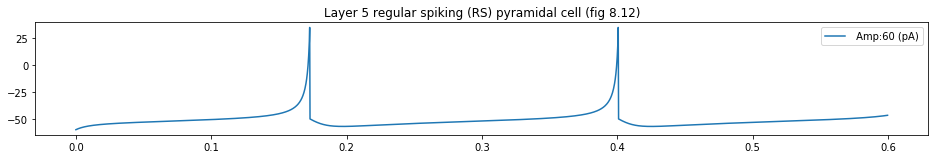

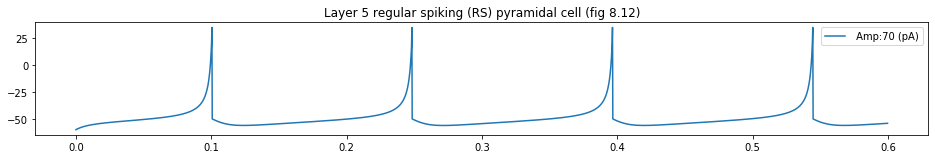

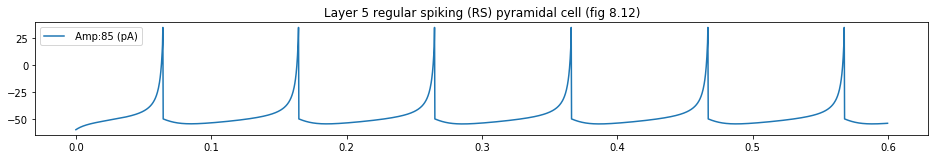

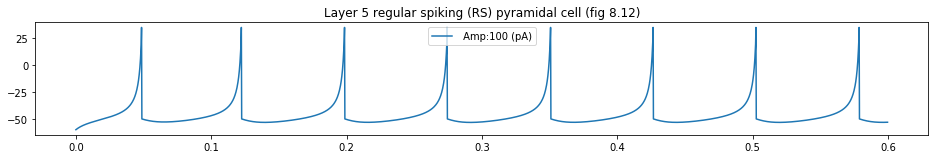

{'C': 89.7960714285714,
 'a': 0.01,
 'b': 15,
 'c': -60,
 'd': 10,
 'k': 1.6,
 'vPeak': 21.138338933982595,
 'vr': -65.2261863636364,
 'vt': -50,
 'celltype': 3}

In [4]:
IinRange = [60,70,85,100];

params = {}
params['amplitude'] = 500*pq.pA
params['delay'] = DELAY
params['duration'] = 600*pq.ms


for i,amp in enumerate(IinRange):

    model = model_classes.IzhiModel()
    model.set_attrs(reduced_cells['RS'])
    assert model._backend.attrs['a'] == reduced_cells['RS']['a']
    params['amplitude'] = amp*pq.pA

    t1 = time.time()
    
    model.inject_square_current(**params)
    vm = model.get_membrane_potential()
    t2 = time.time()
    if i==0:
        print('compile time taken on block {0} '.format(t2-t1))
    else:
        print('time taken on block {0} '.format(t2-t1))
    plt.figure(figsize=(16,12))

    plt.subplot(5,1,i+1)

    plt.plot(vm.times,vm.magnitude,label=str(' Amp:')+str(amp)+str(' (pA)'))
    plt.legend()
    plt.title('Layer 5 regular spiking (RS) pyramidal cell (fig 8.12)')
plt.show()
{'C': 89.7960714285714, 'a': 0.01, 'b': 15, 'c': -60, 'd': 10, 'k': 1.6, 'vPeak': 21.138338933982595, 'vr': -65.2261863636364, 'vt': -50, 'celltype': 3}


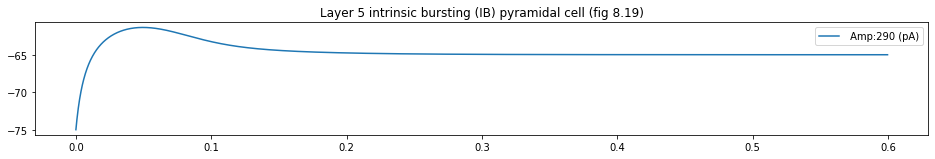

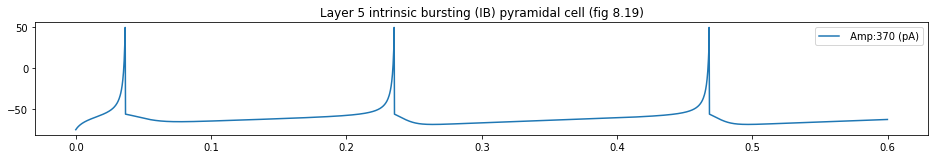

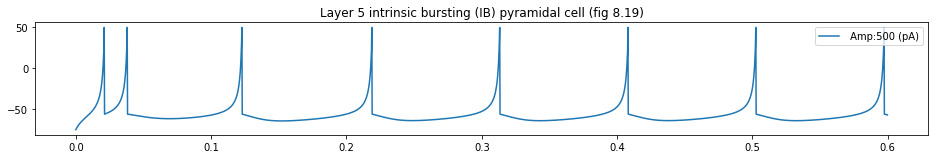

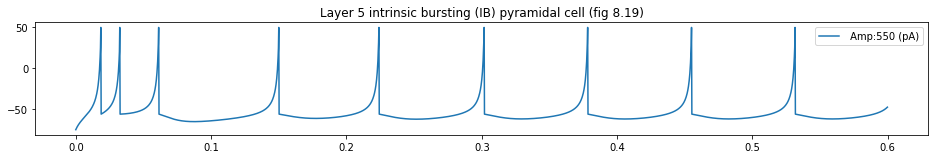

In [6]:
IinRange = [290,370,500,550];

params = {}
params['delay'] = DELAY
params['duration'] = 600*pq.ms


for i,amp in enumerate(IinRange):
    model = model_classes.IzhiModel()

    model.set_attrs(reduced_cells['IB'])
    assert model._backend.attrs['a'] == reduced_cells['IB']['a']
    
    params['amplitude'] = amp


    model.inject_square_current(**params)
    vm = model.get_membrane_potential()
    plt.figure(figsize=(16,12))

    plt.subplot(5,1,i+1)
    plt.title('Layer 5 intrinsic bursting (IB) pyramidal cell (fig 8.19)')

    plt.plot(vm.times,vm.magnitude,label=str(' Amp:')+str(amp)+str(' (pA)'))
    plt.legend()
plt.show()

304.58140142382035 pA


[AnalogSignal with 1 channels of length 4400; units mV; datatype float64 
 sampling rate: 4.0 1/ms
 time: 0.0 s to 1.1 s,
 <module 'matplotlib.pyplot' from '/home/user/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>,

<Figure size 432x288 with 0 Axes>

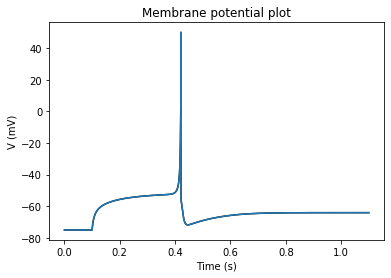

In [7]:
from neuronunit.optimization.optimization_management import inject_and_plot_model,dtc_to_rheo
opt = model.model_to_dtc()
opt.attrs = reduced_cells['IB']
opt=dtc_to_rheo(opt)
print(opt.rheobase)
inject_and_plot_model(opt,plotly=False)

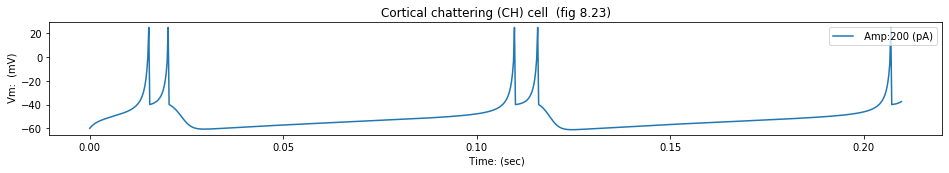

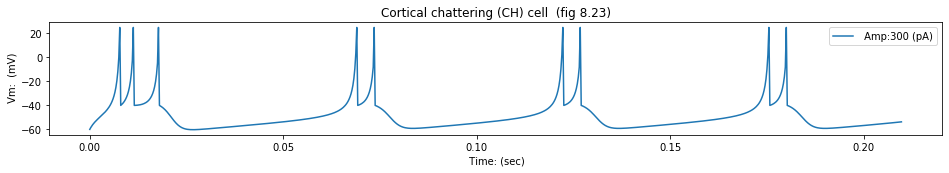

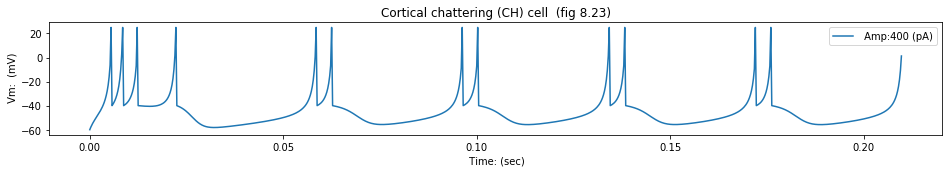

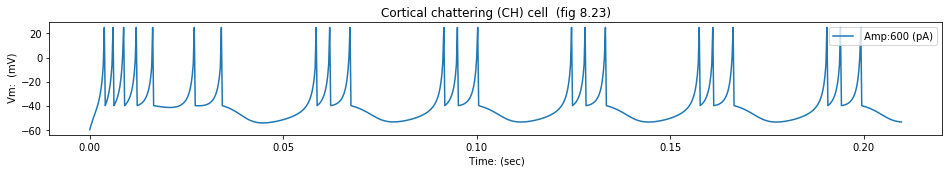

In [8]:
IinRange = [200,300,400,600];

params = {}
params['delay'] = DELAY
params['duration'] = 210*pq.ms


for i,amp in enumerate(IinRange):
    model = model_classes.IzhiModel()

    model._backend.attrs = reduced_cells['CH']
    
    params['amplitude'] = amp*pq.pA

    model.inject_square_current(**params)
    vm = model.get_membrane_potential()
    plt.figure(figsize=(16,12))

    plt.subplot(5,1,i+1)
    plt.title('Cortical chattering (CH) cell  (fig 8.23)')

    plt.plot(vm.times,vm.magnitude,label=str(' Amp:')+str(amp)+str(' (pA)'))
    plt.xlabel(str(' Time:' )+str(' (sec)'))
    plt.ylabel(str(' Vm: ')+str(' (mV)'))

    plt.legend()

plt.show()

157.54986607116734 pA


[AnalogSignal with 1 channels of length 4400; units mV; datatype float64 
 sampling rate: 4.0 1/ms
 time: 0.0 s to 1.1 s,
 <module 'matplotlib.pyplot' from '/home/user/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>,

<Figure size 432x288 with 0 Axes>

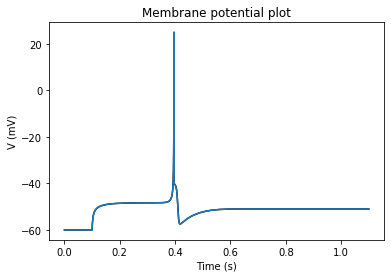

In [9]:
from neuronunit.optimization.optimization_management import inject_and_plot_model,dtc_to_rheo
opt = model.model_to_dtc()
opt.attrs = reduced_cells['CH']
opt=dtc_to_rheo(opt)
print(opt.rheobase)
inject_and_plot_model(opt,plotly=False)